# Algorithms: K-means clustering

So, here we compute k-clusters from the data. There are two axes with labels with X0 in X-axis and X1 in Y-axis. For some given k value, we can divide the data points into clusters. How to compute these k-clusters?

1. The computer chooses 'k' random points to be centroids.
2. The computer calculates the distance between all other points and the centroid. This also is followed by assigning those points to the closest centroid. THis means we take the distance of each other point on the plot with the centroid. Then, whichevver centroid is closest to the point, the point gets assigned to that cluster.
3. Compute new centroids based on the points we have in all the current centroids. Then, we make new clusters and repeat step 2.

We caan stop iterating between steps 2 and 3 at a stage where there is a convergent solution and the centroids and clusters remain same.

After all the computation, the final graph may look like this:

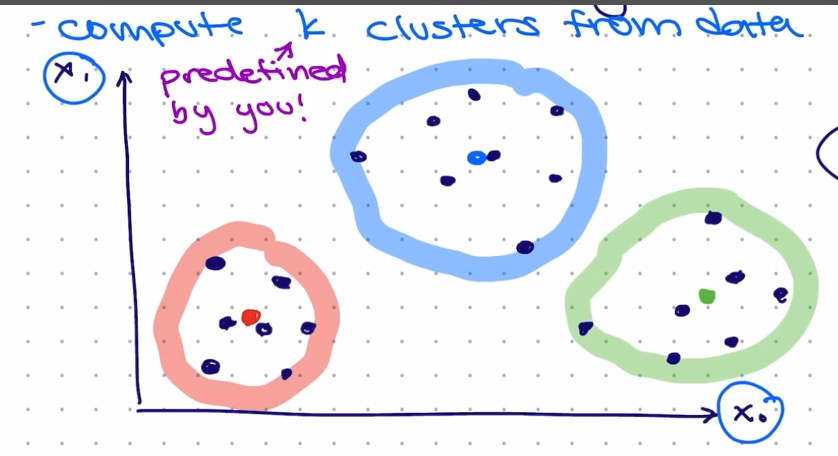



**Expectation Maximization** is the step 2 and 3 iteration. The expectation is where we assign all points to particular centroids based on closest centroid while the maximization step is where we recalculating the same for an accurate cluster and a stable non-iterating position.


In this way, we can introduce a new point to a particular cluster. IN general, we find some structure in the data and hence predict behavior of new points.

# Principal Component Analysis

It is used dimensionality reduction technique. This means we should try to reduce various features down to simple dimensions while still getting the most information out of the points for prediction.

Lets we keep a data of two feature space with some data points. We can take housing data and take a square footage and years since built as two axes. If we want to build a model, we dont have 2 axes. Then, we need PCA for finding dist between points or doing any operation with relation to the points as we can determine the axes for the data points. PCA is a way to find direction in space with the largest variance. This principal component is the component or some direction in space with the largest variance.


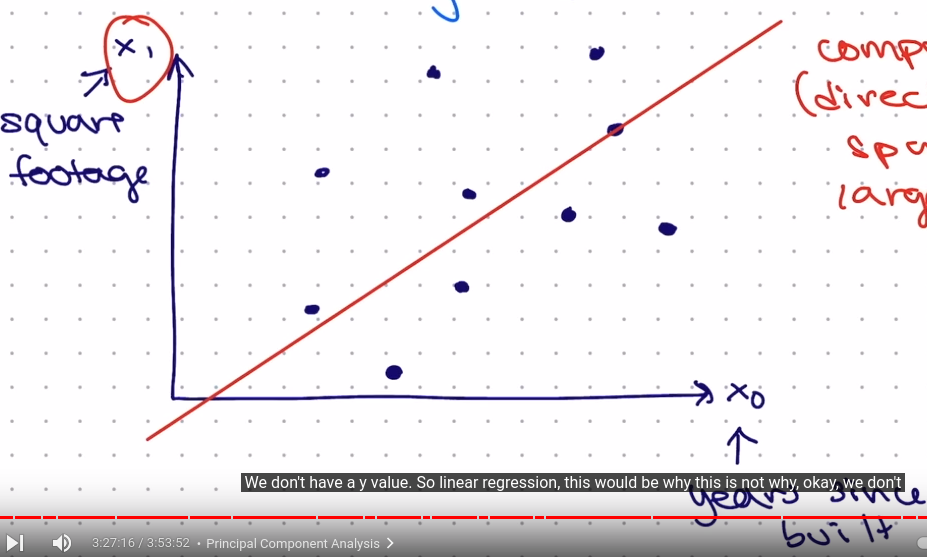

In a graph like this, the line has nothing to do with linear regression because there is actually no such thing as a y-axis here. Both are feature vectors. We are taking the right angle projection onto this line. So, we need to map onto the 1-d line.


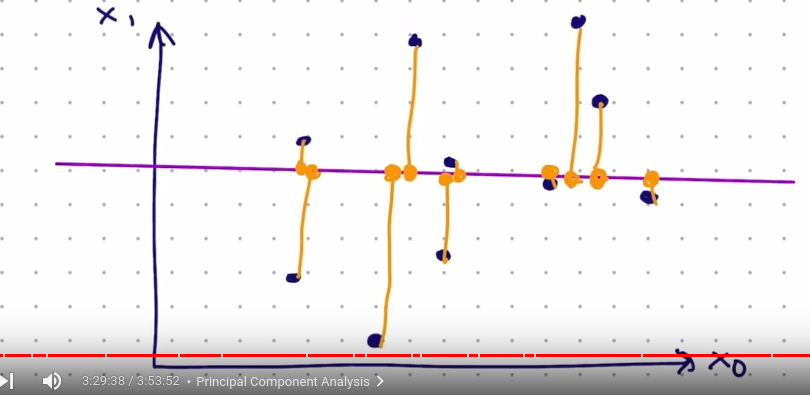


If the line were like this, majority of the points more closer to the line. Thus, this line or dimension cannot provide the largest variance in space. The largest variance wil give more discrimination between the points. The dimension with the the lgrest variance also happens to be the dimension to reduce residuals. In this case, residuals means the distance between the original and its mapping on the predicted dimension.



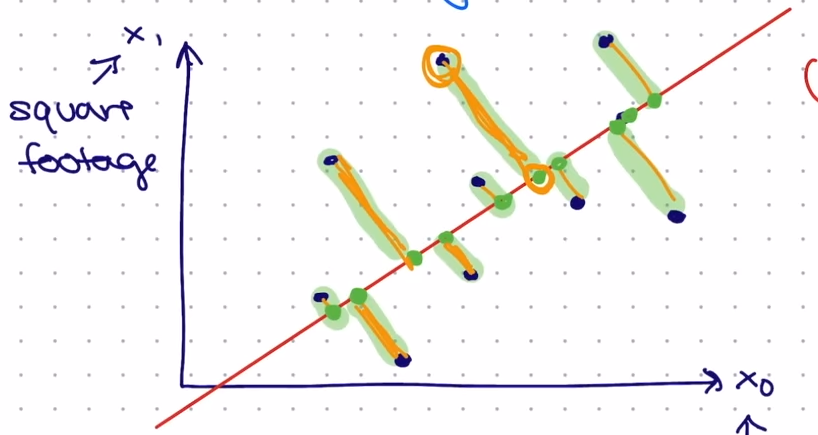


IN this case, the yellow lines are the distances or the residuals. This dimension is called the PCA dimension. It minimizes the projection residuals (the yellow lines summation) and maximize the variance.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cols = ["area","perimeter","compactness","length","width","asymmetry","groove","class"]
data_frame = pd.read_csv("seeds_dataset.txt",names=cols,sep="\s+") #this 'sep' is denoting the seperators. the inside denotes that all spaces are data seperators.

In [ ]:
data_frame.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


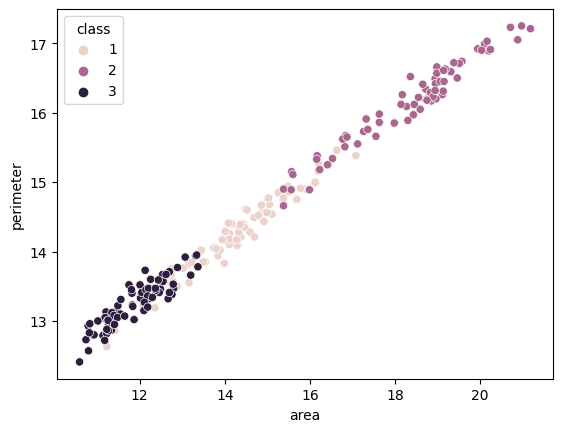

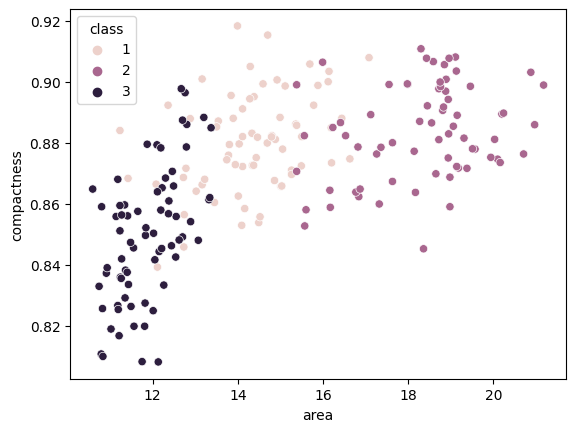

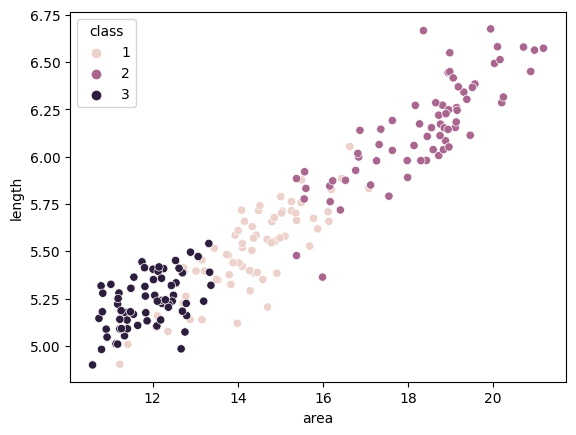

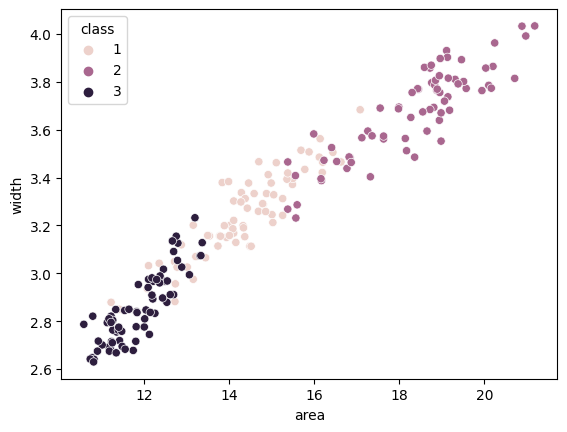

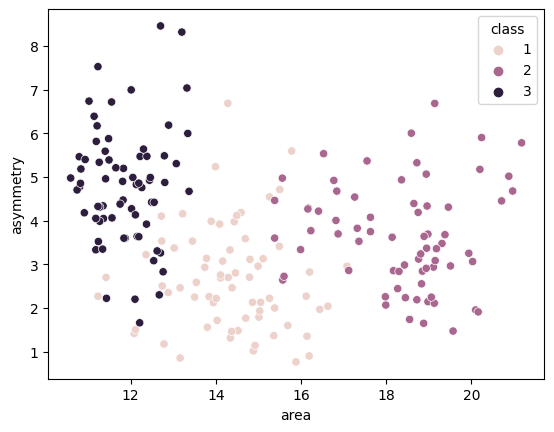

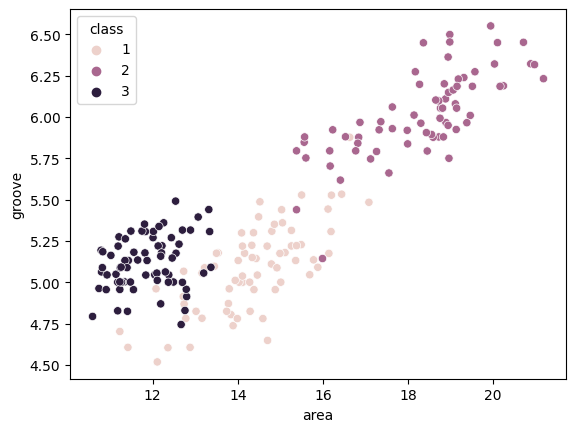

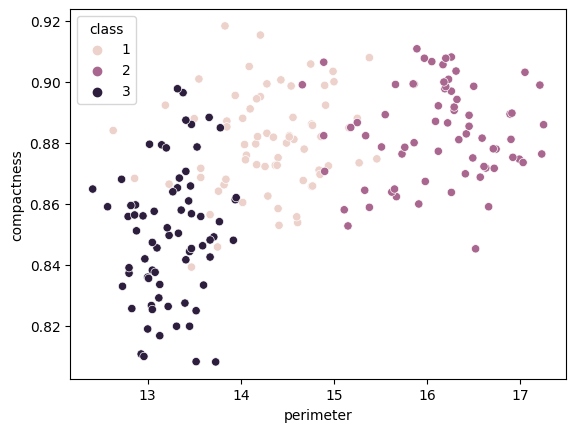

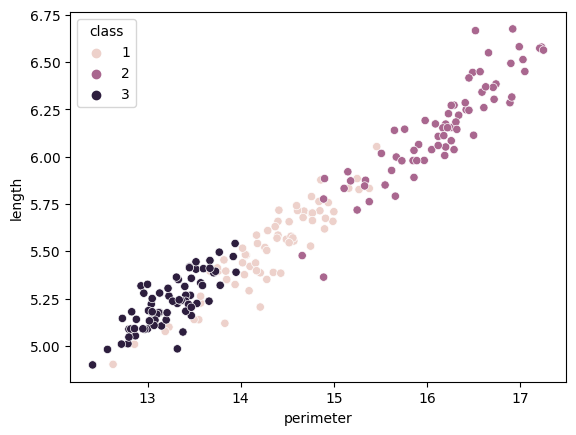

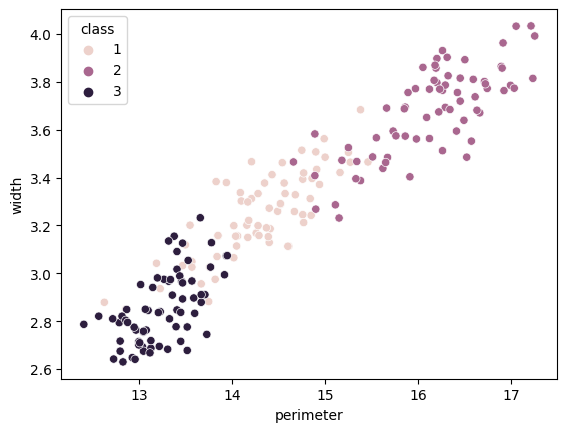

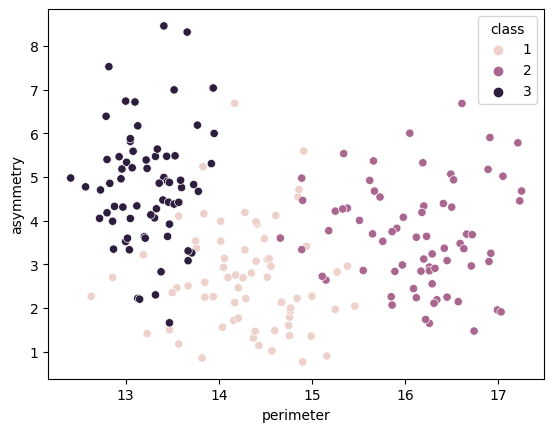

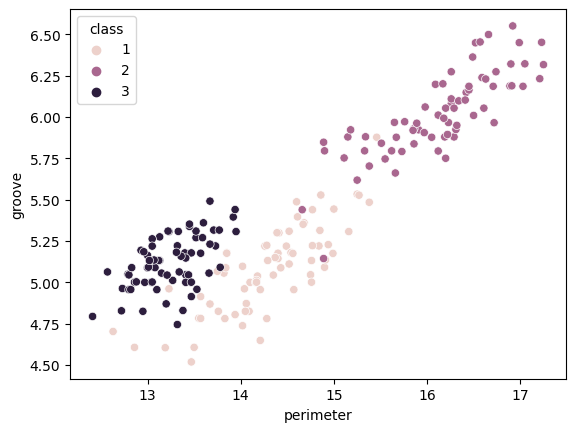

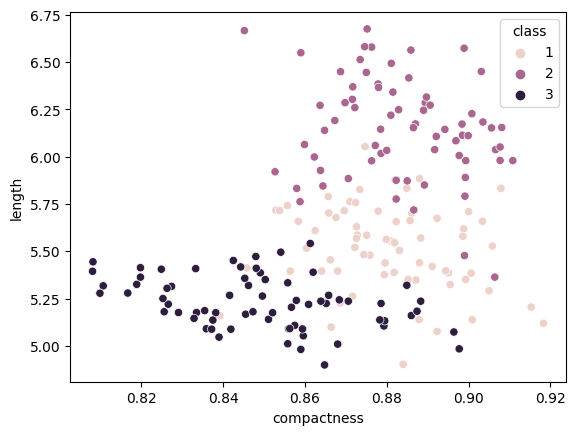

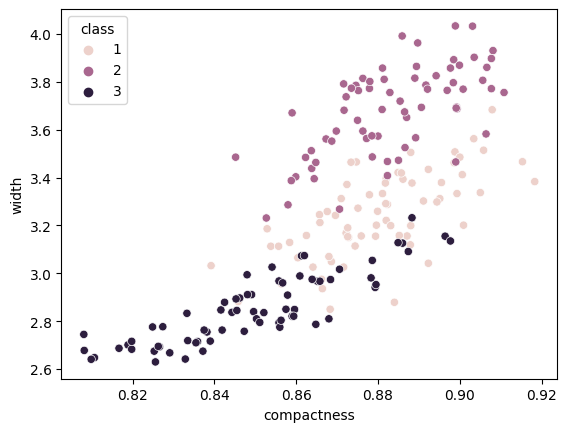

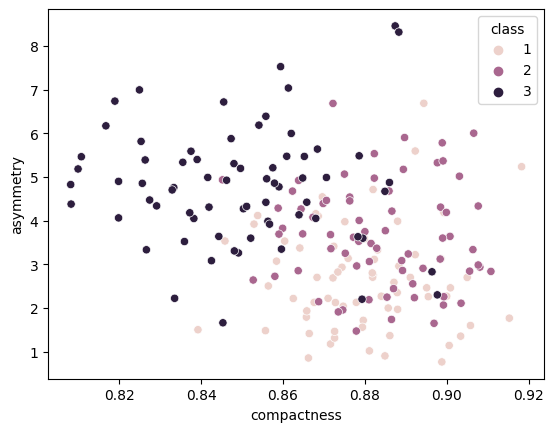

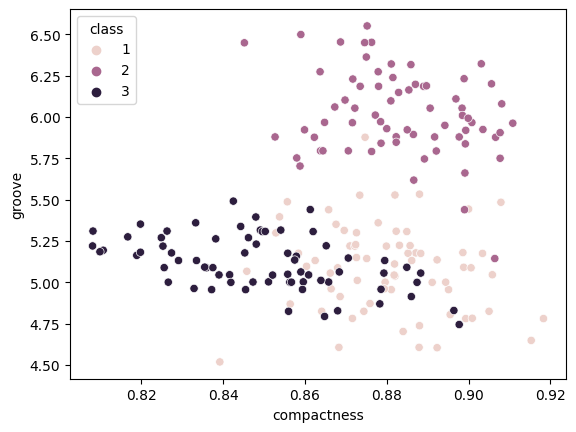

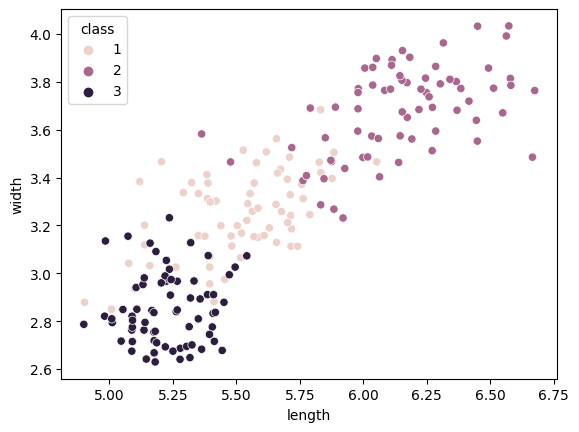

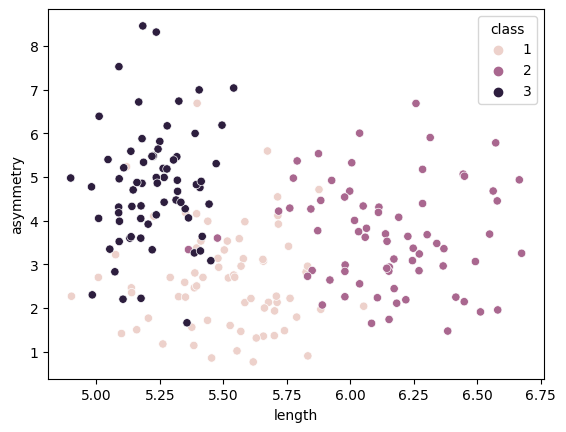

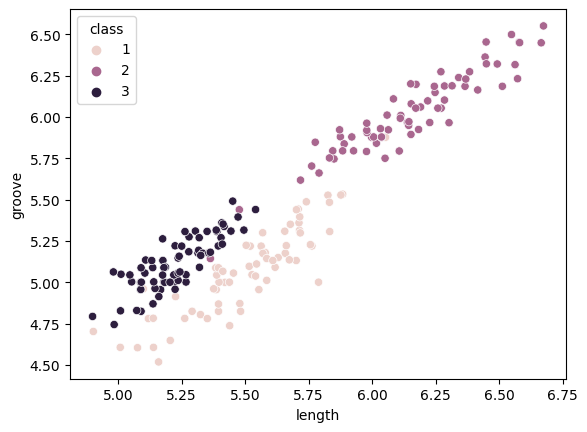

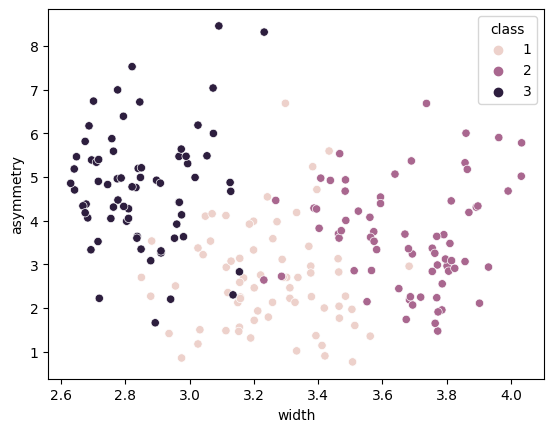

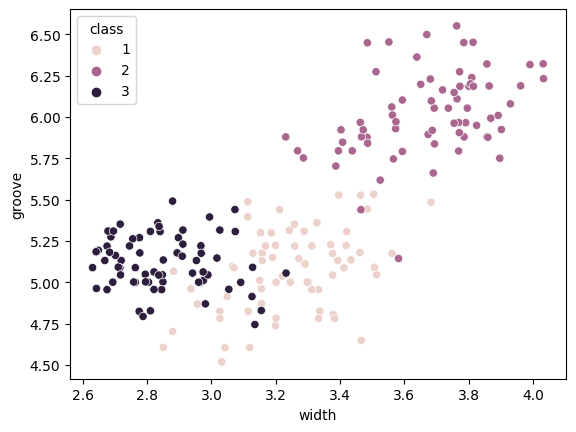

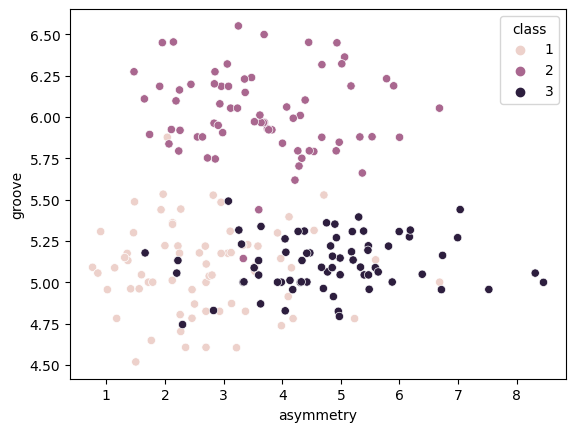

In [ ]:
for i in range(len(cols)-1):
  for j in range(i+1,len(cols)-1):
    x_label=cols[i]
    y_label=cols[j]
    sns.scatterplot(x=x_label,y=y_label,data=data_frame,hue='class')
    plt.show()

# Clustering (k-Means clustering)

In [ ]:
from sklearn.cluster import KMeans

Note 'x' and 'y' that we are about to choose is not in the sense of feature and target but in the sense of two features as we learnt above.

In [ ]:
x="compactness"
y="asymmetry"
X=data_frame[[x,y]].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[]

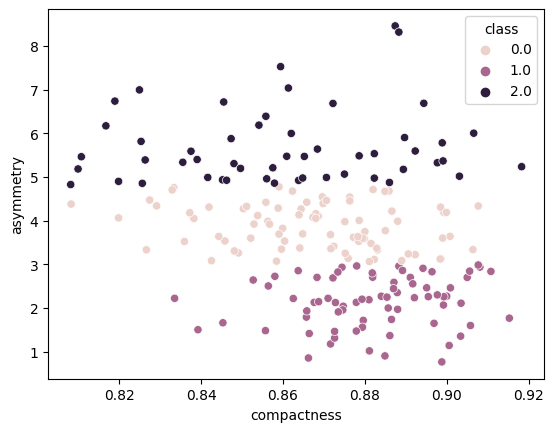

In [ ]:
kmeans = KMeans(n_clusters=3).fit(X)
clusters = kmeans.labels_
cluster_df = pd.DataFrame(np.hstack((X,clusters.reshape(-1,1))),columns=[x,y,"class"])
sns.scatterplot(x=x,y=y,hue='class', data=cluster_df)
plt.plot()

[]

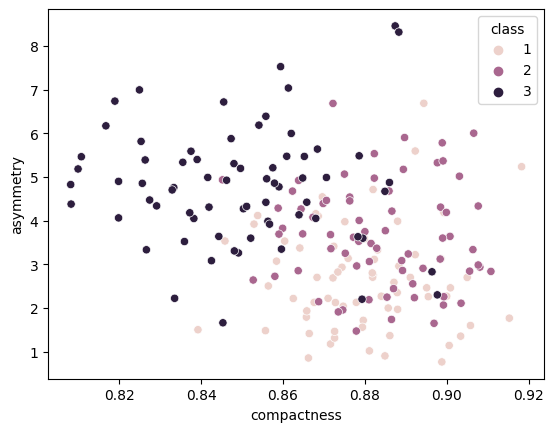

In [ ]:
sns.scatterplot(x=x,y=y,hue='class', data=data_frame)
plt.plot()

# Higher Dimensions

In [ ]:
X= data_frame[cols[:-1]].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[]

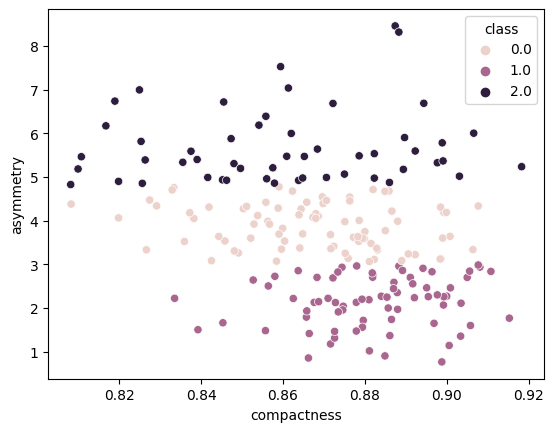

In [ ]:
kmeans = KMeans(n_clusters=3).fit(X)
cluster_df = pd.DataFrame(np.hstack((X,clusters.reshape(-1,1))),columns=data_frame.columns)
sns.scatterplot(x=x,y=y,hue='class', data=cluster_df)
plt.plot()

[]

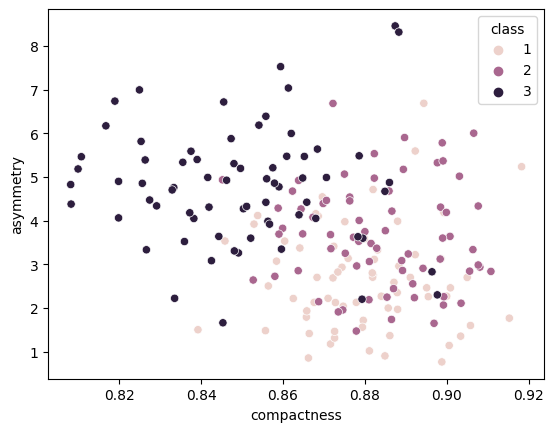

In [ ]:
sns.scatterplot(x=x,y=y,hue='class', data=data_frame)
plt.plot()

# PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA (n_components=2)
transformed_x = pca.fit_transform(X)

In [ ]:
X.shape

(210, 7)

In [ ]:
transformed_x.shape

(210, 2)

In [ ]:
transformed_x[:5]

array([[ 0.66344838, -1.41732098],
       [ 0.31566651, -2.68922915],
       [-0.6604993 , -1.13150635],
       [-1.0552759 , -1.62119002],
       [ 1.61999921, -2.18338442]])

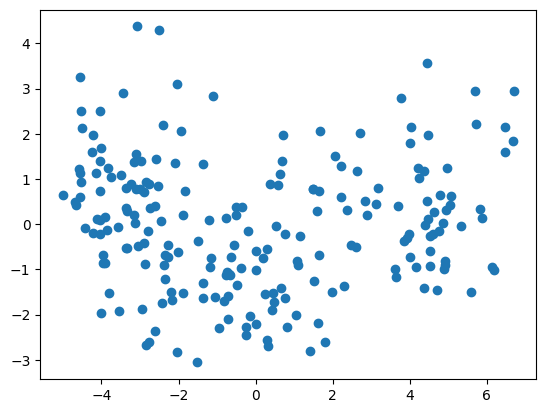

In [ ]:
plt.scatter(transformed_x[:,0],transformed_x[:,1])
plt.show()

In [ ]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x,kmeans.labels_.reshape(-1,1))),columns=["pca1","pca2","class"])

In [ ]:
truth_pca_df = pd.DataFrame(np.hstack((transformed_x,data_frame["class"].values.reshape(-1,1))),columns=["pca1","pca2","class"])

[]

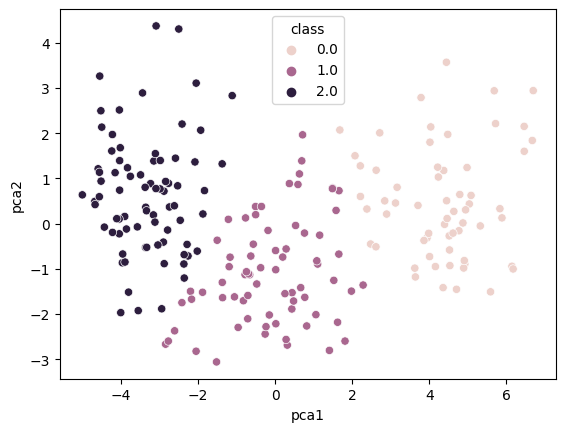

In [ ]:
sns.scatterplot(x="pca1",y="pca2",hue='class', data=kmeans_pca_df)
plt.plot()

[]

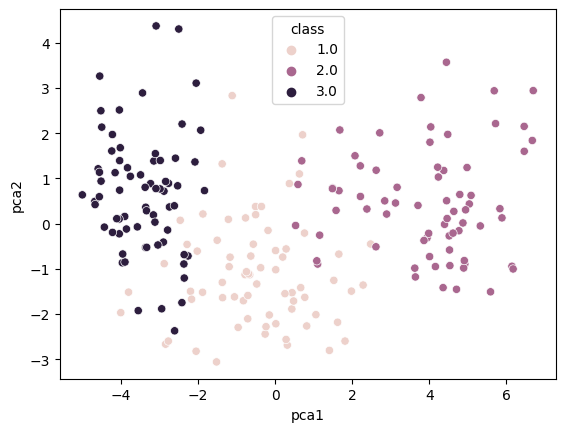

In [ ]:
sns.scatterplot(x="pca1",y="pca2",hue='class', data=truth_pca_df)
plt.plot()